<a href="https://colab.research.google.com/github/okcy58/AI2022/blob/main/ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *10장 순환신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 10.4 텐서플로를 이용하여 단순 RNN 모델 만들기

In [ ]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [ ]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10   # 목표값을 생성함

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [ ]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer ='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 10.5 RNN을 학습시켜 예측을 해 보자.

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)


Epoch 1/300
4/4 [==============================] - 1s 4ms/step - loss: 31.3858
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 29.5950
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 25.0485
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 23.3995
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 23.5803
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 21.6299
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 19.2852
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 19.2898
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 16.6353
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 15.7262
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 13.6023
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 12.2772
Epoch 13/300
4/4 [==============================]

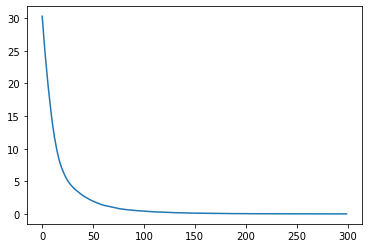

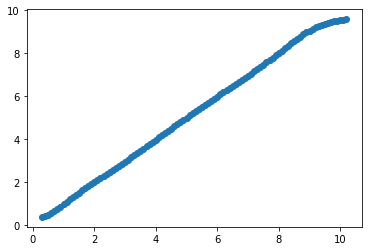

In [ ]:
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [ ]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[9.63176]]
[[9.651968]]


In [ ]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 256)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 7ms/step - loss: 32.9013
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 3.5916
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 5.2051
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 2.2597
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 2.3062
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 1.2301
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 1.6318
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4956
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7021
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3045
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2739
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2030
Epoch 13/300
4/4 [==============================] - 0s 5ms/s

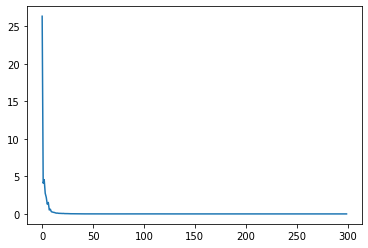

In [ ]:
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

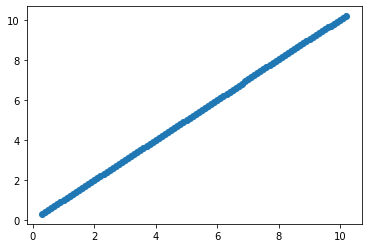

In [ ]:
y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [ ]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.404442]]
[[10.573817]]


### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [ ]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 3, 34)             1224      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 34)                2346      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 35        
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 2s 6ms/step - loss: 28.7875
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 13.2913
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 9.2524
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 7.0078
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 5.8872
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 5.3175
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 4.7810
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 4.1072
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 3.2379
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 2.7599
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 2.2553
Epoch 12/300
4/4 [==============================] - 0s 5ms/step - loss: 2.1855
Epoch 13/300
4/4 [==============================] - 0s 5ms/

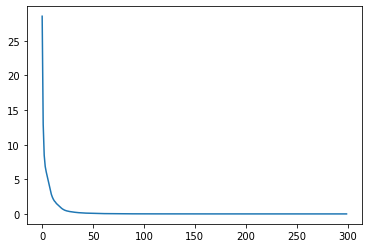

In [ ]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

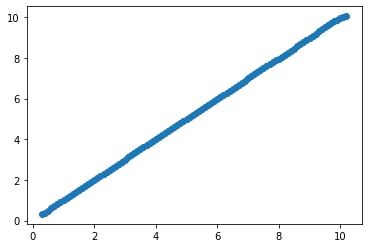

In [ ]:
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [ ]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.1562605]]
[[10.198745]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [1]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [2]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 10.13 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 성능 비교

In [3]:
import tensorflow as tf
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.6558
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2608
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5923
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0554
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2552
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.3290
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0973
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0132
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0876
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1332
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0826
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0170
Epoch 13/100
1/1 [==============================] -

In [4]:
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.4239597 2.4678552 2.5067682 2.541223 ]
실제값 : [2.6 2.7 2.8 2.9]


In [5]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.8580
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 2.8835
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 2.0237
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 1.2266
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 0.5090
Epoch 6/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0447
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 0.3618
Epoch 8/100
1/1 [==============================] - 0s 46ms/step - loss: 0.5413
Epoch 9/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2477
Epoch 10/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0390
Epoch 11/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0189
Epoch 12/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0853
Epoch 13/100
1/1 [==============================] -

In [6]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5622866 2.6429837 2.720566  2.7951458]
실제값 : [2.6 2.7 2.8 2.9]


In [7]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.6179
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 3.5530
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 2.6300
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 1.8270
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 1.1356
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 0.5660
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1585
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0012
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 0.1939
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.4393
Epoch 11/100
1/1 [==============================] - 0s 32ms/step - loss: 0.4107
Epoch 12/100
1/1 [==============================] - 0s 35ms/step - loss: 0.2444
Epoch 13/100
1/1 [==============================] -

In [8]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5659475 2.6582425 2.749913  2.8409505]
실제값 : [2.6 2.7 2.8 2.9]


### LAB 10-1 비선형 시퀀스를 순환신경망으로 예측하자

In [9]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [10]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [11]:
interval

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ])

In [12]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

In [14]:
shift

array([-0.06107518,  0.5434918 ,  0.55861227, -0.55707715, -1.20049684,
        0.12208338,  0.51227817,  0.57681977,  1.02227296,  1.67419092,
       -0.54917426, -0.58270735, -0.37630749, -0.03881822, -1.23671887,
       -0.27774054,  1.27488823,  0.40905268,  1.33200423, -1.45438722,
        1.96505349,  0.45511806,  0.32840388,  0.21329995, -0.3455577 ,
       -0.41657311,  2.33148104,  3.31281013,  0.56592299, -1.05263072,
        0.98737701,  1.91262067,  0.07777967,  0.63403413,  0.10892854,
       -0.03543331, -0.5707354 , -1.94754091,  0.57337918, -0.29098335,
       -0.25605431,  0.75247251,  1.79750246,  0.31542676, -0.44200138,
       -0.52493269,  1.03454313, -0.50330467, -2.10402722,  0.7871176 ,
        0.19830287, -1.35688706,  1.65455232, -0.13463411,  0.35684979,
        0.08240955, -1.84985328,  0.94305735,  0.10441597,  1.29748007,
       -0.4737664 ,  1.08505578, -1.91173789,  0.46417592, -0.71149486,
        1.43957301,  0.69628006, -0.07596659,  1.44794896, -1.51

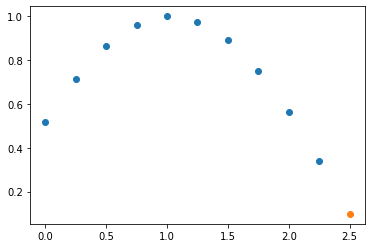

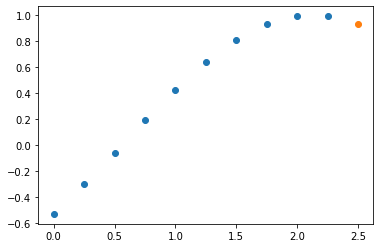

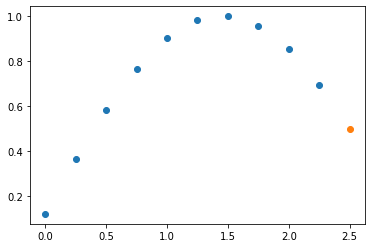

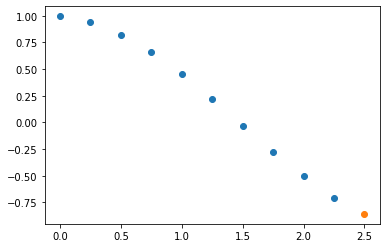

In [15]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [16]:
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

In [17]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 1s 6ms/step - loss: 1.8364
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 1.6833
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 1.5358
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 1.3934
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 1.2553
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 1.1246
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.9928
Epoch 8/50
3/3 [==============================] - 0s 11ms/step - loss: 0.8703
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.7545
Epoch 10/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6465
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 0.5486
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.4575
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0

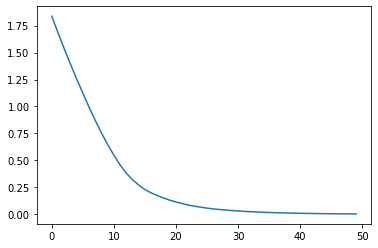

In [18]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

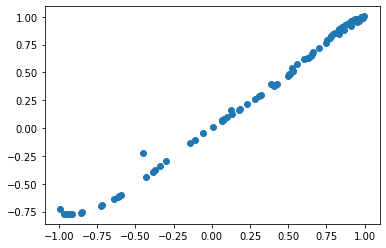

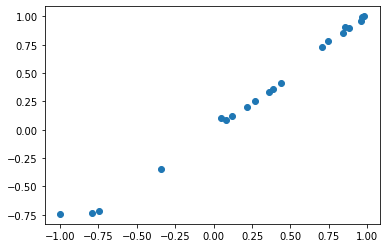

In [19]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

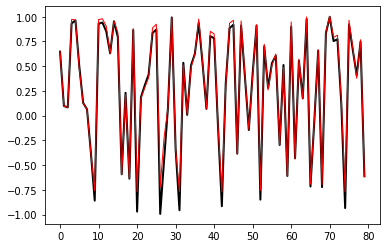

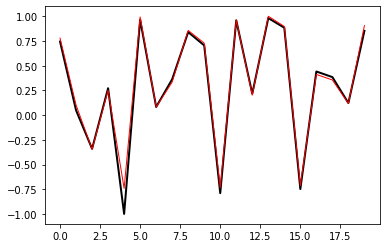

In [20]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [21]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
3/3 [==============================] - 2s 8ms/step - loss: 0.3891
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3756
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3650
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3528
Epoch 5/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3429
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3332
Epoch 7/50
3/3 [==============================] - 0s 6ms/step - loss: 0.3239
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.3150
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3070
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2988
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2911
Epoch 12/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2834
Epoch 13/50
3/3 [==============================] - 0s 7ms/step - loss: 0.

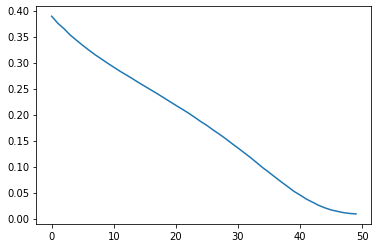

In [22]:
history = LSTM_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])

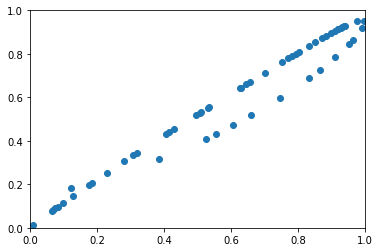

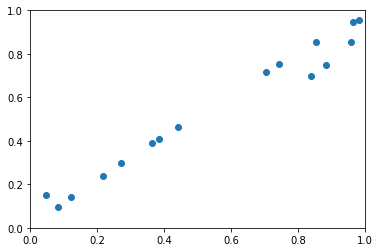

In [23]:
train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()
plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

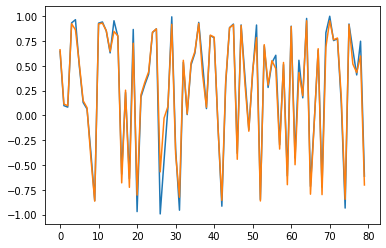

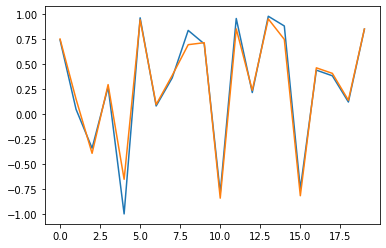

In [24]:
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)

In [36]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

In [37]:
GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.summary()
history = GRU_model.fit(train_X, train_y, epochs=50)
plt.plot(history.history['loss'])
plt.show()

train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)
plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()
plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 10)                390       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


ValueError: ignored

### LAB 10-2 기억이 필요한 시퀀스를 예측해 보자

In [1]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

In [2]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [3]:
import pdb
shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값 
    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()
    #pdb.set_trace()

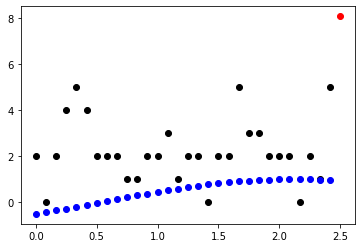

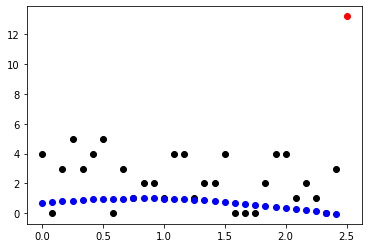

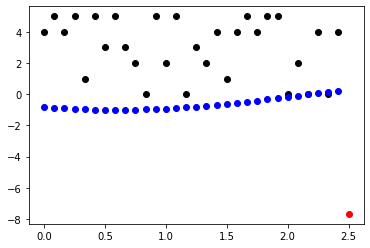

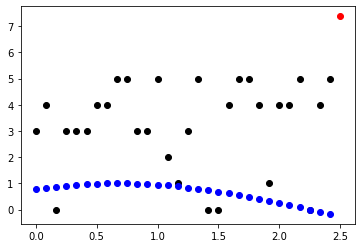

In [4]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k') # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b') # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [5]:
train_X = seq_X[:180]
train_y = Y[:180]
test_X = seq_X[180:]
test_y = Y[180:]

In [6]:
train_X[0]

array([[ 4.        , -0.23757176],
       [ 2.        , -0.15589349],
       [ 1.        , -0.07313326],
       [ 4.        ,  0.01013455],
       [ 4.        ,  0.09333203],
       [ 5.        ,  0.17588174],
       [ 4.        ,  0.25721075],
       [ 0.        ,  0.33675461],
       [ 4.        ,  0.41396125],
       [ 1.        ,  0.48829483],
       [ 0.        ,  0.55923942],
       [ 2.        ,  0.62630266],
       [ 4.        ,  0.68901909],
       [ 4.        ,  0.74695344],
       [ 5.        ,  0.79970361],
       [ 3.        ,  0.84690349],
       [ 1.        ,  0.88822551],
       [ 4.        ,  0.92338286],
       [ 2.        ,  0.95213154],
       [ 1.        ,  0.97427201],
       [ 4.        ,  0.98965063],
       [ 0.        ,  0.99816065],
       [ 5.        ,  0.99974301],
       [ 5.        ,  0.99438672],
       [ 3.        ,  0.98212897],
       [ 5.        ,  0.96305482],
       [ 4.        ,  0.93729666],
       [ 1.        ,  0.90503327],
       [ 4.        ,

In [7]:
import tensorflow as tf
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                130       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [9]:
import tensorflow as tf
simpleRNN_model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model256.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model256.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 256)               66304     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 0s 8ms/step - loss: 6.1950
Epoch 2/150
6/6 [==============================] - 0s 8ms/step - loss: 6.1903
Epoch 3/150
6/6 [==============================] - 0s 9ms/step - loss: 6.1527
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 6.1168
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 6.0839
Epoch 6/150
6/6 [==============================] - 0s 7ms/step - loss: 6.0817
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 6.0762
Epoch 8/150
6/6 [==============================] - 0s 7ms/step - loss: 5.9953
Epoch 9/150
6/6 [==============================] - 0s 6ms/step - loss: 6.0023
Epoch 10/150
6/6 [==============================] - 0s 6ms/step - loss: 6.0676
Epoch 11/150
6/6 [==============================] - 0s 6ms/step - loss: 5.9202
Epoch 12/150
6/6 [==============================] - 0s 6ms/step - loss: 6.0154
Epoch 13/150
6/6 [==============================] - 0s 6ms/st

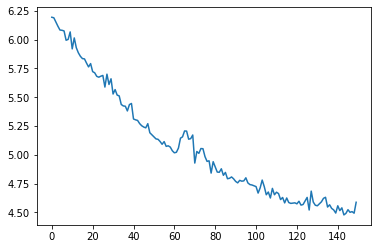

In [12]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

Epoch 1/150
6/6 [==============================] - 0s 22ms/step - loss: 27.4547
Epoch 2/150
6/6 [==============================] - 0s 23ms/step - loss: 27.6494
Epoch 3/150
6/6 [==============================] - 0s 23ms/step - loss: 26.8630
Epoch 4/150
6/6 [==============================] - 0s 23ms/step - loss: 26.5605
Epoch 5/150
6/6 [==============================] - 0s 26ms/step - loss: 28.7355
Epoch 6/150
6/6 [==============================] - 0s 26ms/step - loss: 31.9567
Epoch 7/150
6/6 [==============================] - 0s 23ms/step - loss: 34.8651
Epoch 8/150
6/6 [==============================] - 0s 24ms/step - loss: 34.1661
Epoch 9/150
6/6 [==============================] - 0s 22ms/step - loss: 33.9605
Epoch 10/150
6/6 [==============================] - 0s 23ms/step - loss: 34.0021
Epoch 11/150
6/6 [==============================] - 0s 24ms/step - loss: 33.7805
Epoch 12/150
6/6 [==============================] - 0s 25ms/step - loss: 32.7561
Epoch 13/150
6/6 [===================

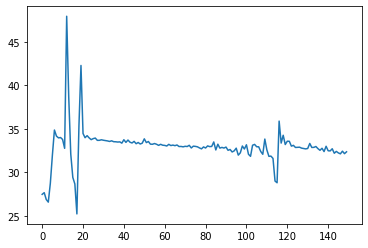

In [13]:
history = simpleRNN_model256.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

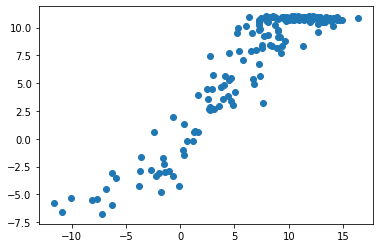

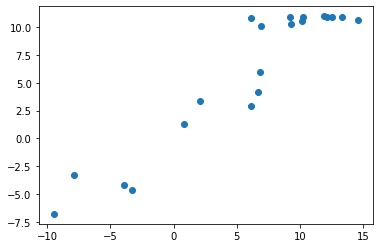

In [16]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

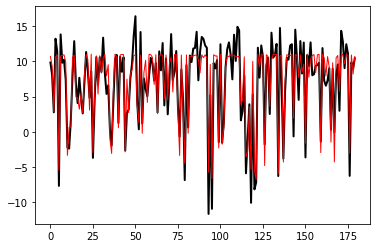

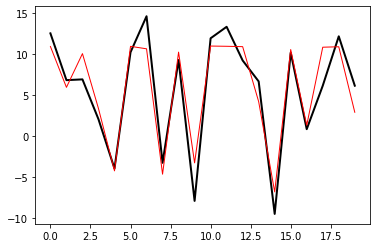

In [17]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

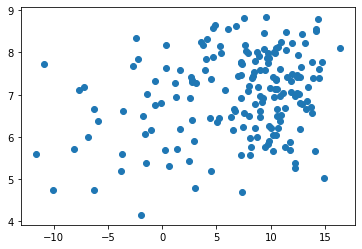

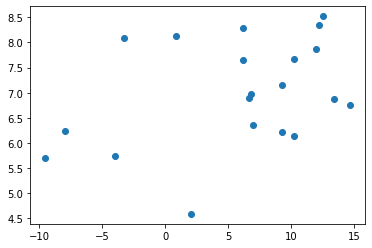

In [18]:
train_y_hat = simpleRNN_model256.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = simpleRNN_model256.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

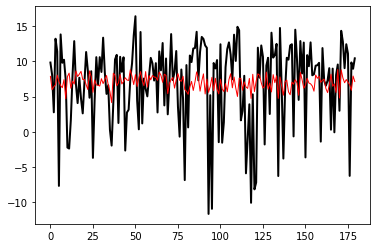

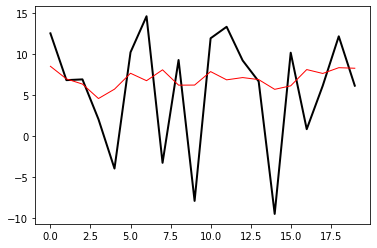

In [19]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [21]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [23]:
LSTM_model256 = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 256, return_sequences=False,
                         input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model256.compile(optimizer ='adam', loss = 'mse')
LSTM_model256.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               265216    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 265,473
Trainable params: 265,473
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 16ms/step - loss: 84.2032
Epoch 2/150
6/6 [==============================] - 0s 15ms/step - loss: 82.0886
Epoch 3/150
6/6 [==============================] - 0s 14ms/step - loss: 79.9504
Epoch 4/150
6/6 [==============================] - 0s 15ms/step - loss: 77.8008
Epoch 5/150
6/6 [==============================] - 0s 14ms/step - loss: 75.9235
Epoch 6/150
6/6 [==============================] - 0s 12ms/step - loss: 74.1088
Epoch 7/150
6/6 [==============================] - 0s 13ms/step - loss: 72.2958
Epoch 8/150
6/6 [==============================] - 0s 14ms/step - loss: 70.4468
Epoch 9/150
6/6 [==============================] - 0s 15ms/step - loss: 68.5195
Epoch 10/150
6/6 [==============================] - 0s 17ms/step - loss: 66.6644
Epoch 11/150
6/6 [==============================] - 0s 15ms/step - loss: 64.7667
Epoch 12/150
6/6 [==============================] - 0s 15ms/step - loss: 62.9456
Epoch 13/150
6/6 [===================

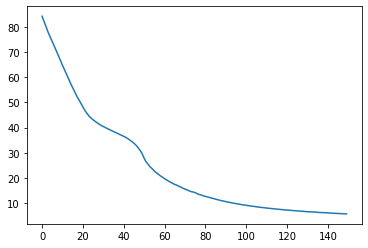

In [24]:
history = LSTM_model.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])

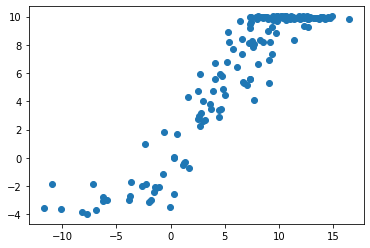

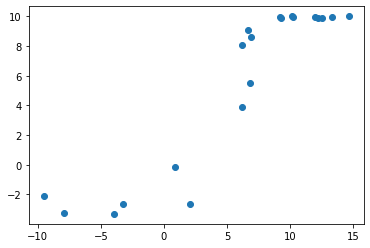

In [25]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

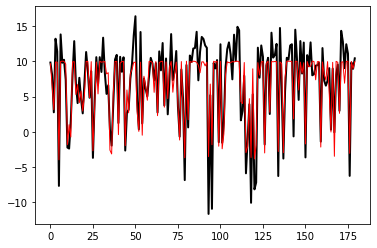

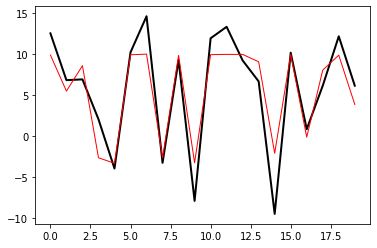

In [26]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

Epoch 1/150
6/6 [==============================] - 3s 98ms/step - loss: 61.3479
Epoch 2/150
6/6 [==============================] - 1s 93ms/step - loss: 34.6338
Epoch 3/150
6/6 [==============================] - 1s 94ms/step - loss: 34.0698
Epoch 4/150
6/6 [==============================] - 1s 90ms/step - loss: 33.9525
Epoch 5/150
6/6 [==============================] - 1s 98ms/step - loss: 33.7651
Epoch 6/150
6/6 [==============================] - 1s 91ms/step - loss: 33.1105
Epoch 7/150
6/6 [==============================] - 1s 91ms/step - loss: 30.6577
Epoch 8/150
6/6 [==============================] - 1s 96ms/step - loss: 25.4568
Epoch 9/150
6/6 [==============================] - 1s 91ms/step - loss: 26.2947
Epoch 10/150
6/6 [==============================] - 1s 92ms/step - loss: 20.8646
Epoch 11/150
6/6 [==============================] - 1s 91ms/step - loss: 18.7583
Epoch 12/150
6/6 [==============================] - 1s 92ms/step - loss: 20.5686
Epoch 13/150
6/6 [===================

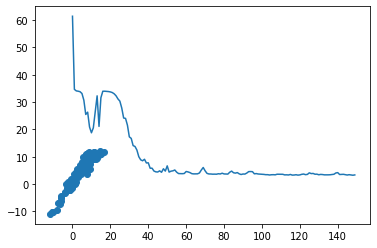

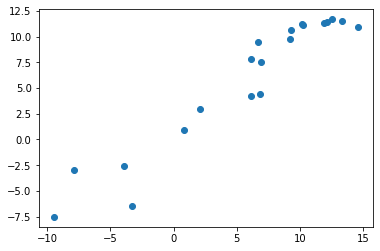

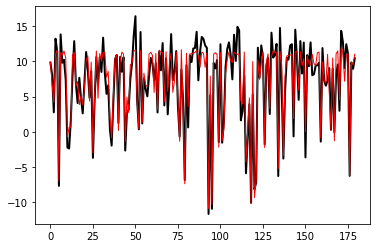

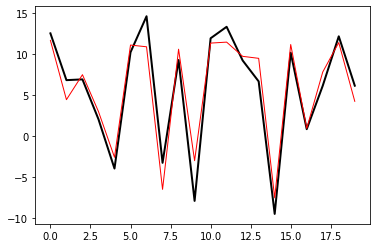

In [27]:
history = LSTM_model256.fit(train_X, train_y, epochs=150)
plt.plot(history.history['loss'])
train_y_hat = LSTM_model256.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model256.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [29]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
GRU_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 10)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [31]:
GRU_model256 = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 256, return_sequences=False, 
                        input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
GRU_model256.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 256)               199680    
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 199,937
Trainable params: 199,937
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
6/6 [==============================] - 2s 15ms/step - loss: 92.5831
Epoch 2/150
6/6 [==============================] - 0s 15ms/step - loss: 90.3877
Epoch 3/150
6/6 [==============================] - 0s 17ms/step - loss: 88.2172
Epoch 4/150
6/6 [==============================] - 0s 15ms/step - loss: 86.1780
Epoch 5/150
6/6 [==============================] - 0s 15ms/step - loss: 84.1394
Epoch 6/150
6/6 [==============================] - 0s 16ms/step - loss: 82.2363
Epoch 7/150
6/6 [==============================] - 0s 16ms/step - loss: 80.2680
Epoch 8/150
6/6 [==============================] - 0s 14ms/step - loss: 78.2593
Epoch 9/150
6/6 [==============================] - 0s 15ms/step - loss: 76.3625
Epoch 10/150
6/6 [==============================] - 0s 19ms/step - loss: 74.3803
Epoch 11/150
6/6 [==============================] - 0s 15ms/step - loss: 72.4295
Epoch 12/150
6/6 [==============================] - 0s 16ms/step - loss: 70.4557
Epoch 13/150
6/6 [===================

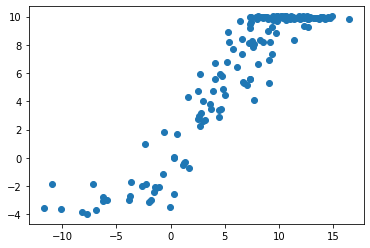

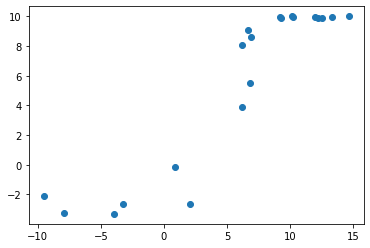

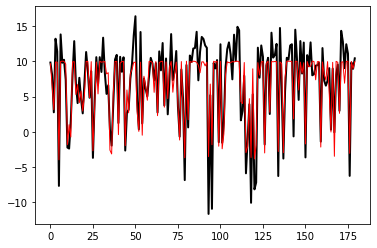

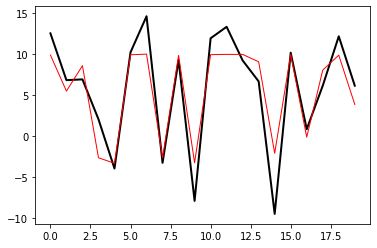

In [32]:

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

Epoch 1/150
6/6 [==============================] - 3s 78ms/step - loss: 73.6565
Epoch 2/150
6/6 [==============================] - 0s 83ms/step - loss: 38.1392
Epoch 3/150
6/6 [==============================] - 0s 77ms/step - loss: 37.2276
Epoch 4/150
6/6 [==============================] - 0s 77ms/step - loss: 34.3649
Epoch 5/150
6/6 [==============================] - 0s 77ms/step - loss: 30.8684
Epoch 6/150
6/6 [==============================] - 0s 74ms/step - loss: 28.8218
Epoch 7/150
6/6 [==============================] - 0s 71ms/step - loss: 25.6214
Epoch 8/150
6/6 [==============================] - 0s 75ms/step - loss: 19.5020
Epoch 9/150
6/6 [==============================] - 0s 71ms/step - loss: 12.1633
Epoch 10/150
6/6 [==============================] - 0s 73ms/step - loss: 7.6212
Epoch 11/150
6/6 [==============================] - 0s 76ms/step - loss: 8.0973
Epoch 12/150
6/6 [==============================] - 0s 73ms/step - loss: 7.4909
Epoch 13/150
6/6 [======================

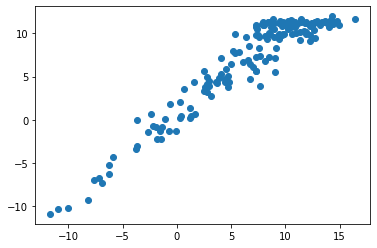

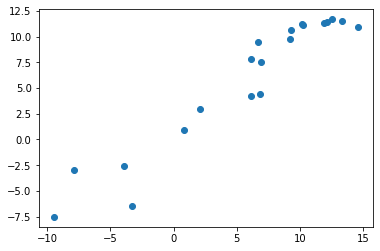

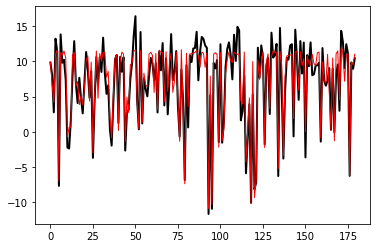

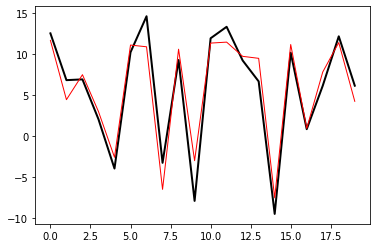

In [33]:
GRU_model256.compile(optimizer ='adam', loss = 'mse')
GRU_model256.fit(train_X, train_y, epochs=150)
train_y_hat = LSTM_model256.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()
test_y_hat = LSTM_model256.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()
plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)